In [1]:
import cudafrompy
import numpy as np

# C

In [2]:
#call hello world extension
cudafrompy._c.hello_world()

Hello world!

In [3]:
#errors
cudafrompy._c.raise_error()

error: Example exception

In [4]:
#Person class usage
person = cudafrompy._c.Person("Timur")
person_kwargs = cudafrompy._c.Person(name = "Kwargs")

In [5]:
#person name member
person.name

'Timur'

In [6]:
#call methods
person.greet()

Hello Timur!


In [7]:
person_kwargs.greet()

Hello Kwargs!


# CUDA

In [8]:
#get number of available devices
devs = cudafrompy._cuda.get_device_count()
print(f"Devices: {devs}")

Devices: 1


In [9]:
#mem info from _cuda module
cudafrompy._cuda.mem_info()

{'free': 2034499584, 'total': 2101870592}

In [10]:
#wrapped mem info from cudafrompy package
cudafrompy.mem_info()

Free 1.89GB of 1.96GB


In [11]:
#reset device memory
cudafrompy._cuda.device_reset()

In [12]:
#create two ndarrays
shape = 5000000
a = np.arange(shape, dtype=np.int32)
b = np.arange(shape, dtype=np.int32)

In [13]:
#add them on GPU
c, time = cudafrompy._cuda.add(a, b, 100)

#third argument is optional
c, time = cudafrompy._cuda.add(a, b)

In [14]:
False in (c == a + b)

False

In [15]:
cudafrompy.mem_info()

Free 1.78GB of 1.96GB


In [16]:
cudafrompy._cuda.device_reset()

### Exceptions

In [17]:
cudafrompy._cuda.add(2, 2, 100)

TypeError: ndarrays required

In [18]:
cudafrompy._cuda.add(np.zeros((2,2)), np.ones(2))

AttributeError: Vectors required. Given dims 2 and 1

In [19]:
cudafrompy._cuda.add(np.zeros(3), np.ones(2))

AttributeError: operands could not be broadcast together with shapes (3,) (2,) 

### Benchmark

In [20]:
from time import time
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [23]:
def benchmark(n, threads = 128):
    if (n < 7):
        return
    shapes = [2 ** i for i in range(7, n)]
    cpu_times = []
    gpu_times = []
    
    
    for shape in shapes:        
        start = time()
        a = np.random.randint(0, 100, shape, dtype=np.int32)
        b = np.random.randint(0, 100, shape, dtype=np.int32)
        
        cpu = a + b
        
        cpu_times.append(time() - start)
        
        gpu, t = cudafrompy._cuda.add(a, b, threads)
        
        gpu_times.append(t)
        cudafrompy._cuda.device_reset()
        
        if (False in (gpu == cpu)):
            raise RuntimeError("Arrays are not equal")
        
    x = np.log2(shapes)
    fig = plt.figure(figsize=[16/2, 9 / 2])
    plt.plot(x, gpu_times);
    plt.plot(x, cpu_times);

    plt.legend(["GPU", "CPU"])
    plt.xlabel("log2(Vector Size)")
    plt.ylabel("time(s)")
    plt.yscale("log")
    plt.title("VectorSum")
    plt.show()
        
        

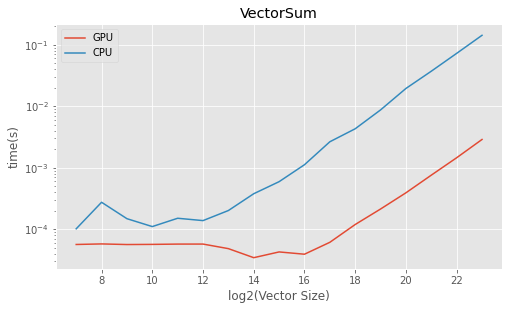

In [24]:
benchmark(24, 512)

# Ctypes

In [36]:
import ctypes
libc = ctypes.cdll.LoadLibrary("libc.so.6")
libc.time(None)

1588615018